# Case Study - Reviewer Classification

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [9]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here... 
import pandas as pd
import numpy as np 

data = pd.read_csv("data/moped.csv")

# Unique values and missing count

print(data.info())
for column in data.columns:
    
	print(column,": ",data[column].unique())

# Indicate ownership
data.loc[data['Owned for'].isin(['> 6 months','<= 6 months']),'Owned for'] = 'Owned'

# Fill missing values
data.fillna(0, inplace=True)

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB
None
Used it for :  ['Commuting' 'Leisure']
Owned for :  ['Never owned' '> 6 months' '<= 6 months']
Model Name :  ['TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revo

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here*
1. Used it for:	Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.
This column has 713 non-null values. So, there are not any missing values in this column. The type is object which matches the character. This column has 2 unique values 'Commuting' and 'Leisure' which matches the criteria.


2. Owned for: Character, duration of ownership of vehicle one of “<= 6 months”, “> 6 months”, “Never Owned”. Rows that indicate ownership should be combined into the category “Owned”.
This column has 713 non-null values. So, there are not any missing values in this column. The type is object which matches the character. This column has 3 unique values 'Never owned', '> 6 months', '<= 6 months' which matches the criteria. Rows with values '> 6 months' and '<= 6 months' are combined into the category 'Owned'. So, the unique valuse will be 'Owned' and “Never Owned”.


3. Model Name: Character, the name of the electric moped. 
This column has 713 non-null values. So, there are not any missing values in this column. The type is object which matches the character. This column has 38 unique values as following. 
'TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revolt RV 300' 'Hero Electric Photon' 'Okinawa Praise' 'Benling Aura'
 'Ampere Magnus Pro' 'PURE EV EPluto 7G' 'Ampere REO' 'Odysse Evoqis'
 'Okinawa i-Praise' 'Joy e-bike Monster' 'PURE EV ETrance Neo'
 'Evolet Polo' 'Okinawa Ridge Plus' 'Ampere Zeal' 'Hero Electric Atria'
 'Okinawa Lite' 'Hero Electric NYX' 'Okinawa R30' 'Yo Drift' 'BGauss B8'
 'Joy e-bike Wolf' 'Gemopai Astrid Lite' 'Techo Electra Emerge'
 'Techo Electra Raptor' 'e-bike Gen Nxt' 'Gemopai Ryder'


4. Visual Appeal: Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).
This column has 713 non-null values. So, there are not any missing values in this column. The type is float64 which matches the numeric type. This column has 5 unique values {1,2,3,4,5}. 


5. Reliability: Numeric, reliability rating (on a 5 point scale, replace missing values with 0).
This column has 713 non-null values. So, there are not any missing values in this column. The type is float64 which matches the numeric type. This column has 5 unique values {1,2,3,4,5}. 


6. Extra Feature: Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).
This column has 183 non-null values. So, there are 530 missing values in this column. The type is float64 which matches the numeric type. This column has 5 unique values {1,2,3,4,5}. After replacesing the missing values with , the unique values change to {0,1,2,3,4,5}.

7. Comfort: Numeric, comfort rating (on a 5 point scale, replace missing values with 0).
This column has 510 non-null values. So, there are 220 missing values in this column. The type is float64 which matches the numeric type. This column has 5 unique values {1,2,3,4,5}. After replacesing the missing values with , the unique values change to {0,1,2,3,4,5}.

8. Maintenance cost: Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).
This column has 176 non-null values. So, there are 537 missing values in this column. The type is float64 which matches the numeric type. This column has 5 unique values {1,2,3,4,5}. After replacesing the missing values with , the unique values change to {0,1,2,3,4,5}.

9. Value for money: Numeric, value for money rating (on a 5 point scale, replace missing values with 0).
This column has 370 non-null values. So, there are 343 missing values in this column. The type is float64 which matches the numeric type. This column has 5 unique values {1,2,3,4,5}. After replacesing the missing values with , the unique values change to {0,1,2,3,4,5}.


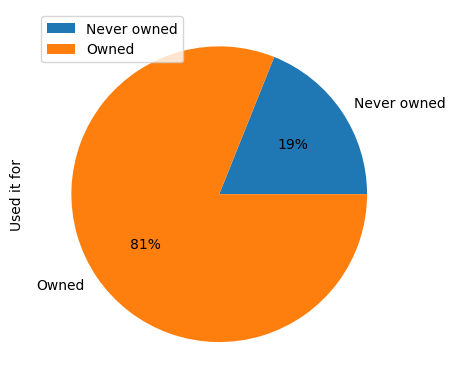

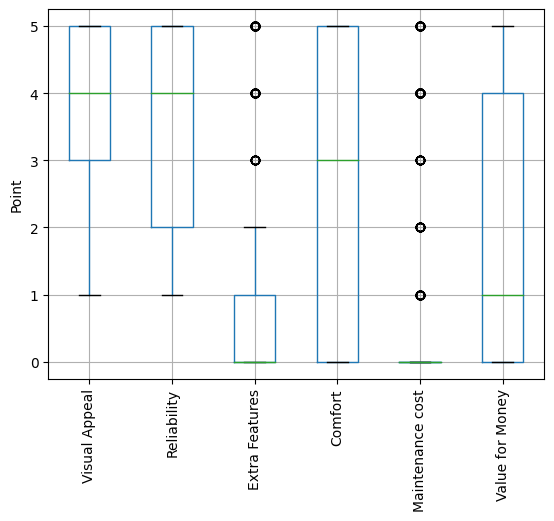

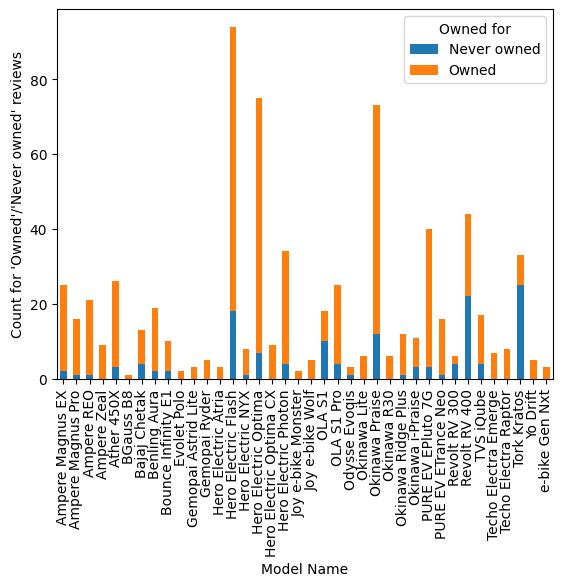

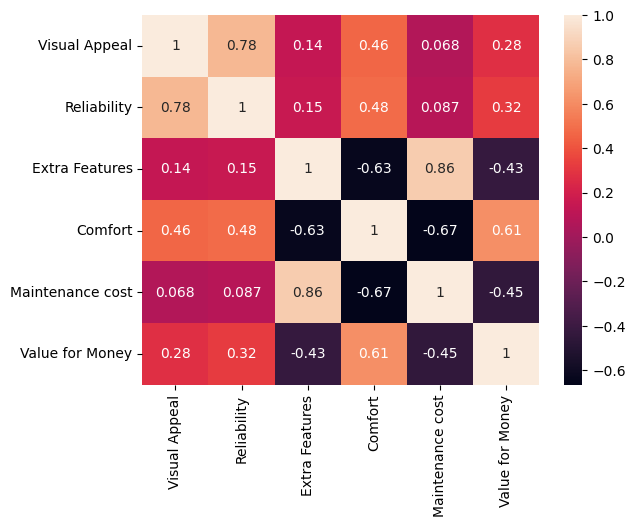

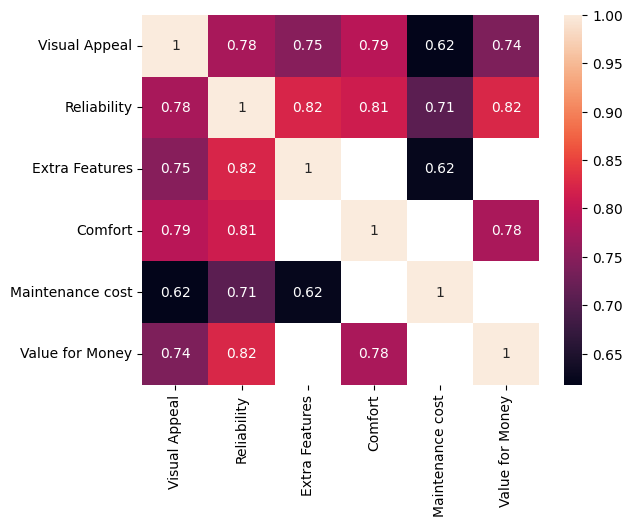

In [10]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 
import matplotlib.pyplot as plt
import seaborn as sns 


# Plotting the pie chart for reponse variable distribution
data.groupby(['Owned for']).count()[['Used it for']].plot(kind='pie', y='Used it for', autopct='%1.0f%%')
plt.show()

# Boxplot for numerical variables
data.boxplot(rot=90).set_ylabel('Point')  
plt.show()

# Count for each Model Name for each 'Owned for' category
data_modelgroup = data.groupby(['Model Name','Owned for'])['Used it for'].count()
data_modelgroup.reset_index()
data_modelgroup.unstack().plot(kind='bar', stacked=True, ylabel='Count for \'Owned\'/\'Never owned\' reviews')
plt.show()

# Heatmap
corr_matrix=data.iloc[:,3:].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Heatmap for non-null variables
data2 = pd.read_csv("data/moped.csv")
data2.dropna()
corr_matrix=data2.iloc[:,3:].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Scale the numerical values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_numeric = scale.fit_transform(data.iloc[:,3:])
scaled_data = data
scaled_data.iloc[:,3:] = scaled_numeric

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*
1. Based on the first plot, which is a pie chart, the response variable is 81% of the 'Owned' class and 19% for the 'Never owned'. This shows the dataset is imbalanced and this should be considered for dividing the train and test sets.
2. The second plot is a boxplot that shows the distribution of each numerical variable of the dataset. As shown in the plot, 'Maintanance cost' and 'Comfort' have the least and largest ranges, respectively. Also, we already know that 'Maintanance cost' and 'Extra features' have the most number of missing values in the dataset. After we replace the missing values with 0s, most of the data in these columns change to 0. That is why the boxplots for these variables have a small range and the non-zero values seem to be outliers. 
3. The third plot is a barplot. This shows that for some of the 'Model name's like 'Yo Drift' we just have reviews from the 'Owned' category. For most of the models the percentage of 'Owned' reviews is higher than 'Never Owned'. However, there are some models like 'Revolt RV 300' and 'Tork Kratos' that the 'Never Owned' reviews has a higher proportion.
4. The heatmap shows the linear correlation of each two numerical variables. 'Maintenance cost' and 'Extra Features' have a high linear correlation. Also, 'Reliability' and 'Visual Appeal' have a high correlation. However, the reason for these variables could be the high number of missing values replaced by zeros. To test that, we use heatmap for the rows with no null values for any variable. In that heatmap we can see that the correlation decreases to 0.62. Also, we can see that the linear correlation for 'Reliability' and 'Value for money' decreases when the missing values are replaced by 0. 
5. Although the numerical variables are scores from 0 to 5, we use standard scaler to scale the variables for the linear models since the lower bound for some of the variables is 1 and for some 0.


In [11]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 


# Label encode the response variable 'Never owned':1 (positive) and 'Owned':0 (negative)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Owned', 'Never owned'])
scaled_data['Owned for'] = le.transform(scaled_data['Owned for'])
scaled_data['Owned for'] = scaled_data['Owned for'].apply(lambda x: 1 if x==0 else 0)
Y = scaled_data['Owned for']
X = scaled_data.drop(columns=['Owned for'])



# Base model
# Predict 0 or 'Owned' for all the test instances
Y_pred_base = list([0]*143)


# Logistic Regression

# Get dummy variables for the categorical variables
X_reg = pd.get_dummies(X)
Y_reg = Y
# Split train and test set. For each of them 'Owned'/'Never Owned' should be equal to 81/29 (stratify)
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg.values, Y_reg.values, test_size = 0.2, stratify = Y, random_state=42)


from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit(X_reg_train,y_reg_train)
y_reg_pred = reg.predict(X_reg_test)


# Random Forest

# Label encoding the categorical variables
for i in ['Used it for','Model Name']:
	le.fit(scaled_data[i])
	scaled_data[i] = le.transform(scaled_data[i])

X = scaled_data.drop(columns=['Owned for'])

from sklearn.ensemble import RandomForestClassifier

# Split train and test set. For each of them 'Owned'/'Never Owned' should be equal to 81/29 (stratify)
X_rf = X.values
Y_rf = Y.values
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, Y_rf, test_size = 0.2, stratify = Y_rf, random_state=42)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_rf_train,y_rf_train)
y_rf_pred=clf.predict(X_rf_test)

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*
- The response variable is a binary variable 'Owned':0 and 'Never owned':1. So, it is a binary classification problem. 
- Since the dataset is imbalanced and 'Owned'/'Never owned'=80/20, I set the baseline to be y_prediction = 0 for all the rows. This is not a good model but the accuracy is 80%. 
- For comparison, first logistic regression is used to predict the output. Since the data is imbalanced, stratify is used to ensure the same ratio of the response variable in the train and test set as the whole dataset (train to test ratio is 80 to 20). Next, a random forest classifier is used with stratify as a more complicated method.

In [12]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

from sklearn.metrics import f1_score
print('Baseline F1 is: ', f1_score(Y_pred_base, y_reg_test))
print('Logistic Regression F1 is: ', f1_score(y_reg_pred, y_reg_test))
print('Random forest F1 is: ', f1_score(y_rf_pred, y_rf_test))

Baseline F1 is:  0.0
Logistic Regression F1 is:  0.4444444444444445
Random forest F1 is:  0.3555555555555555


## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*
- As discussed before, due to the imbalance of the dataset, accuracy cannot be a good evaluation method. However, recall is a good evaluation parameter since it shows the percentage of 'Never own's detected truly. Also, precision can be used to show the percentage of 'Never own' detected instances to be actually true. Thus, F1-score can be used which takes into account both recall and precision.
- As expected, although the accuracy for the baseline is high the F1-score is 0. Both logistic regression and random forest methods work better than the baseline. Also, the F1-score for both is almost equal. However, the score is still not high. Methods like hyperprameter tuning or balancing the dataset can help to increase the score in this case.
- Both logisitc regression and random forest work better than our baseline model. 